In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import sqrt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV  # tìm kiếm tham số tối ưu cho một mô hình Machine Learning bằng cách thử nghiệm tất cả các kết hợp của các tham số được chỉ định.

# sklearn là thư viện để gọi các model

In [ ]:
# open csv file
data = pd.read_csv("/content/gdrive/MyDrive/1_Data_Science_Machine_Learning/TaiLieu/datasets/diabetes.csv")


In [ ]:
# print infomation dataset
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

In [ ]:
result = data.corr() # xem hệ số tương quan của các feature
print(result)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [ ]:
print(data.value_counts()) # đếm số lần xuất hiện của từng giá trị duy nhất trong một cột hoặc một Series.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [ ]:
print(data["Outcome"].value_counts()) # đếm tần suất xuất hiện của giá trị

Outcome
0    500
1    268
Name: count, dtype: int64


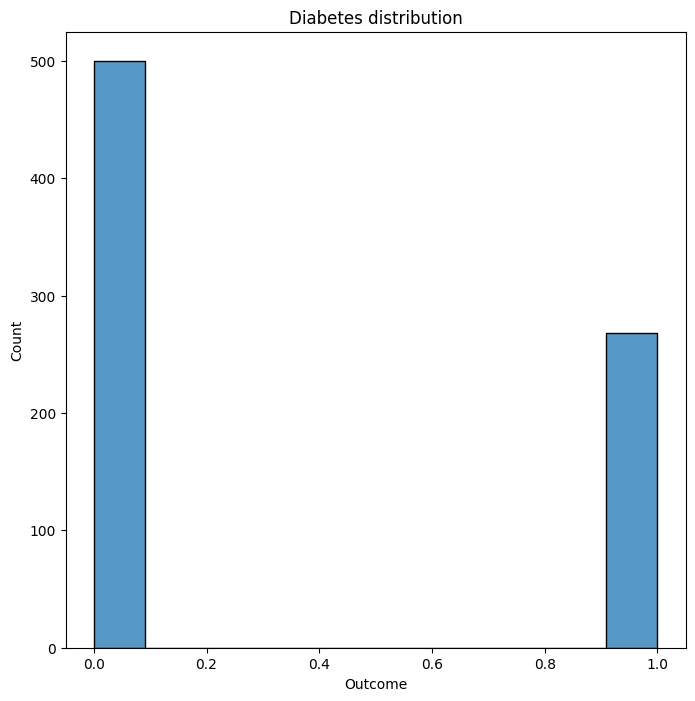

In [ ]:
# paint plot for column Outcome
plt.figure(figsize=(8,8))
sn.histplot(data["Outcome"])
plt.title("Diabetes distribution")
plt.savefig("/content/gdrive/MyDrive/1_Data_Science_Machine_Learning/TaiLieu/datasets/diabetes.jpg") # lưu lại cái đồ thị

In [ ]:
# phân chia dữ liệu - feature sang 1 bên và target sang 1 bên  theo chiều dọc và
# phân chia dữ liệu theo bộ test và bộ train theo chiều ngang - bộ val sẽ được chỉ sau


# phân theo chiều dọc trước - set features and target (x là feature , y là target)
target = "Outcome"
x = data.drop(target , axis = 1)
y = data[target]
print(x)
print(y)
# asix = 0 or 1 drop theo hàng or cột





     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
# phân theo chiều ngang - split data
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size =0.8, random_state=42) # 80 - 20
# train_size - % dữ liệu (0 < < 1) chia cho bộ train
# random_state - đảm bảo dữ liệu sau mỗi lần chạy luôn giống nhau - khi mặc định nó là none và mỗi lần chạy nó sẽ làm thay đổi bộ train
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

614 614
154 154


In [ ]:
print(x_train.head()) # cái số ở đầu tiên là thứ tự trong bộ dữ liệu gốc - tương tự x_test, y_train , y_test

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  


In [ ]:
# Ở đây dữ liệu đều là dạng số nên có thể áp dụng các tiền xử lý về số như numerical features
# buộc phải xử lý để đưa các feature về 1 cùng range giống nhau (ví dụ cùng nằm trong khoảng 0 - 1) - vì dữ liệu càng lớn càng được mô hình chú tâm hơn nên buộc phải xử lý
# giữa MinMaxScaler , RobelScaler, StandardScaler - bạn dùng cái nào cũng được vì kết quả cũng như nhau

# cách tính StandardScaler
# z = (x-u)/s     - x là giá trị gốc , u là trung bình của tập dữ liệu , s là độ lệch chuẩn của tập dữ liệu

In [ ]:
scaler = StandardScaler()

# chưa biến đổi x_train và x_test nên test trước để xem
# result_x_train = scaler.fit_transform(x_train[["Pregnancies"]])
# u = scaler.mean_
# s = sqrt(scaler.var_)
# print(f"{u}     {s}")
# for i,j in zip(x_train["Pregnancies"].values, result_x_train):
#   print("Before {}  After  {} ".format(i,j))


# transform x_train , x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]


In [ ]:
# init model
cls = SVC()

# training model with x_train and y_train
cls.fit(x_train, y_train)

# SVC() là một thuật toán Support Vector Machine (SVM) dùng để phân loại dữ liệu.
# Mặc định, SVC() sử dụng kernel tuyến tính (RBF kernel) để tìm ra siêu phẳng tối ưu cho việc phân loại dữ liệu.

# Sau khi huấn luyện xong, mô hình sử dụng x_test để đưa ra dự đoán y_predict (predict result with x_test )
y_predict = cls.predict(x_test)


# compare y_test with y_predict
# for i, j in zip(y_test, y_predict):
#   print("Actual {} predict {}". format(i,j))
print(classification_report(y_test, y_predict)) # in ra đủ các tham số như accuracy , precition , recall, f1-score

# marco avg : trung bình cộng

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
# test với model khác

cls_1 = RandomForestClassifier()

cls_1.fit(x_train, y_train)

y_predict_1 = cls_1.predict(x_test)

print(classification_report(y_test, y_predict_1)) # in ra đủ các tham số như accuracy , precition , recall, f1-score

# marco avg : trung bình cộng

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



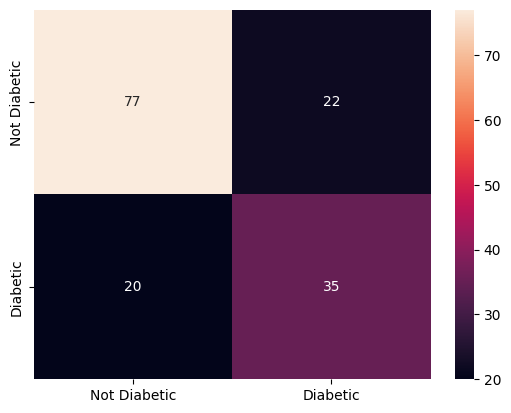

In [ ]:
# trick để dùng cho các bản báo cáo

cm = np.array(confusion_matrix(y_test, y_predict_1, labels= [0,1])) # kể cả với classification_report thì luôn là gọi nhãn trước rồi mới đến dự đoán
# confusion = pd.DataFrame(cm, index = ["Not Diabetic"; "Diabetic"], columns=["Not Diabetic", "Diabetic"])
confusion = pd.DataFrame(cm, index = ["Not Diabetic", "Diabetic"] , columns = ["Not Diabetic", "Diabetic"] )

# diabetic : ng mắc bệnh đái tháo đường
sn.heatmap(confusion,  annot= True, fmt = "g")
plt.savefig("/content/gdrive/MyDrive/1_Data_Science_Machine_Learning/DAY6/result_image/heatmap.jpg") # lưu lại cái đồ thị - cái để gắn vào báo cáo


# cm = np.array(confusion_matrix(y_test, y_predict, labels= [0,1]))
# Hàm confusion_matrix() từ sklearn.metrics tạo ma trận nhầm lẫn.
# labels=[0,1] đảm bảo rằng nhãn 0 (Not Diabetic) và nhãn 1 (Diabetic) được sắp xếp đúng thứ tự (tránh tình trạng mặc định sắp xếp sai nếu dữ liệu thiếu nhãn).
# Kết quả là một ma trận NumPy dạng
# [[TN  FP]
# [FN  TP]]
    # TN (True Negative): Số mẫu thực sự "Not Diabetic" và dự đoán đúng.
    # FP (False Positive): Số mẫu thực sự "Not Diabetic" nhưng bị dự đoán sai là "Diabetic".
    # FN (False Negative): Số mẫu thực sự "Diabetic" nhưng bị dự đoán sai là "Not Diabetic".
    # TP (True Positive): Số mẫu thực sự "Diabetic" và dự đoán đúng.



# confusion = pd.DataFrame(cm, index=["Not Diabetic", "Diabetic"], columns=["Not Diabetic", "Diabetic"])
# Dùng Pandas DataFrame để trình bày ma trận nhầm lẫn dưới dạng bảng dễ đọc.
# index (hàng): Nhãn thực tế.
# columns (cột): Nhãn dự đoán.


# sn.heatmap(confusion, annot=True, fmt="g")
# sn.heatmap(): Vẽ biểu đồ heatmap từ DataFrame confusion.
# annot=True: Hiển thị số liệu trên từng ô.
# fmt="g": Định dạng số hiển thị là số nguyên (g = general format, không có dạng số mũ hoặc float).

In [ ]:
# Test với GridSearch

parameters = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth" : [None, 5, 10],
    "max_features" : ["sqrt", "log2"],
}

# GridSearchCV sẽ thử tất cả các tổ hợp có thể của các giá trị này:
# n_estimators: số lượng cây trong rừng (50, 100 hoặc 200 cây)
# criterion: tiêu chí phân chia (gini, entropy hoặc log_loss)
# max_depth: độ sâu tối đa của cây (không giới hạn, 5 hoặc 10)


clsG = GridSearchCV(RandomForestClassifier(), param_grid=parameters , scoring="f1", cv=6, verbose=1, n_jobs= 2)
# Mô hình cơ sở là RandomForestClassifier
# param_grid: các tham số cần tối ưu
# scoring="f1": sử dụng F1-score làm metric đánh giá
# cv=6: sử dụng 6-fold cross-validation
# verbose=1: hiển thị thông tin trong quá trình huấn luyện
# n_jobs : số nhân trong máy - nhiều nhân thì chạy nhanh hơn  - mặc định là 1

clsG.fit(x_train, y_train)
# cv : k-fold cross-validation  - mặc định k =  5
# scoring : là các chỉ số như accuracy , f1, precition - nếu k chỉ định mặc định là accuracy

# accuracy chỉ phù hợp cho những bộ dữ liệu cân bằng nhưng thực tế thì không


print(clsG.best_score_) # điểm số scoring (ở đây bạn chọn là f1 ) nên nó sẽ là điểm số s1 tốt nhất
print(clsG.best_params_) # đưa ra bộ than số tốt nhất sau khi test
y_predict_G = clsG.predict(x_test) # khi mà nó tìm ra model tốt nhất mặc định nó sẽ đem đi predict
print(classification_report(y_test, y_predict_G))



Fitting 6 folds for each of 54 candidates, totalling 324 fits
0.6585981263536241
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# check số nhân
import multiprocessing
print("Number of CPU cores:", multiprocessing.cpu_count())

Number of CPU cores: 2


# fit , fit_transform , transform có gì khác nhau
  + fit : mới chỉ dùng đo thông số
  + transform : chỉ có thể biến đổi theo thông số đã đo ở fit khi đã fit tối thiểu 1 lần
  + fit_transform : làm 2 việc luôn là vừa fit vừa transform

  + với bộ train dùng fit_transform còn bộ test chỉ dùng transform vì bộ nó đã đo rồi nên khi test không cần fit lại nữa

# lưu ý bộ dataset ở đây chưa bị lỗi nên bạn ch xét đến việc xử lý lại dữ liệu